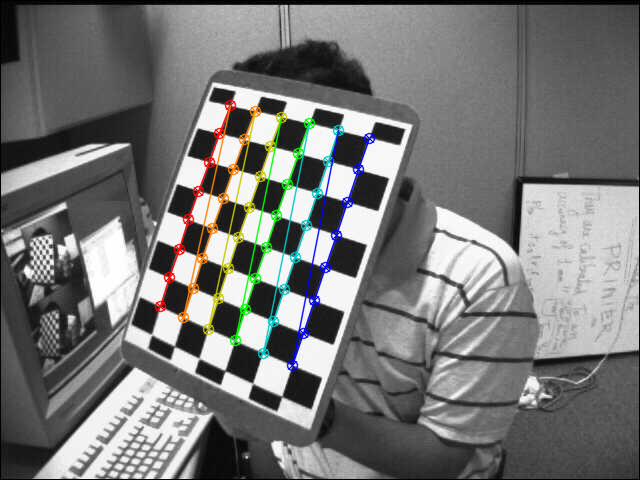

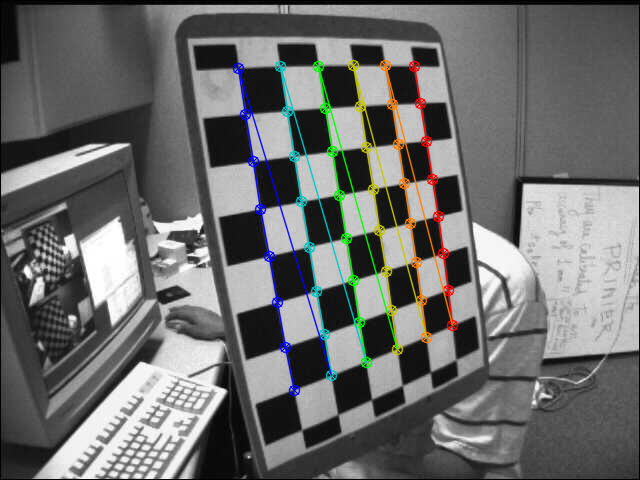

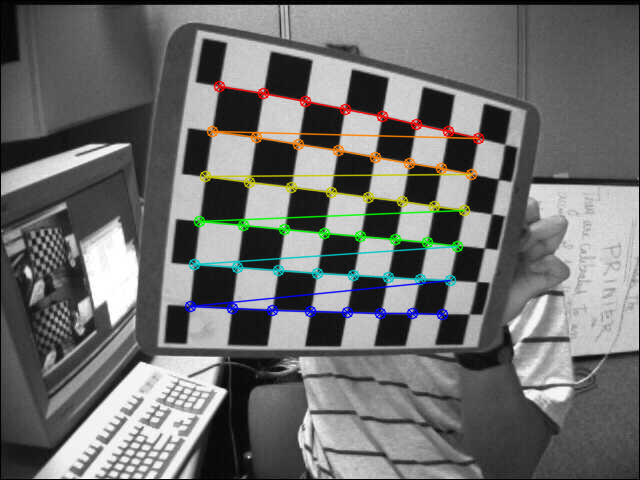

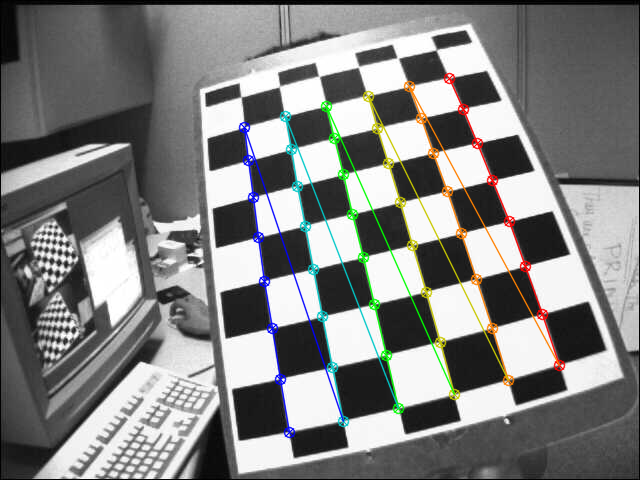

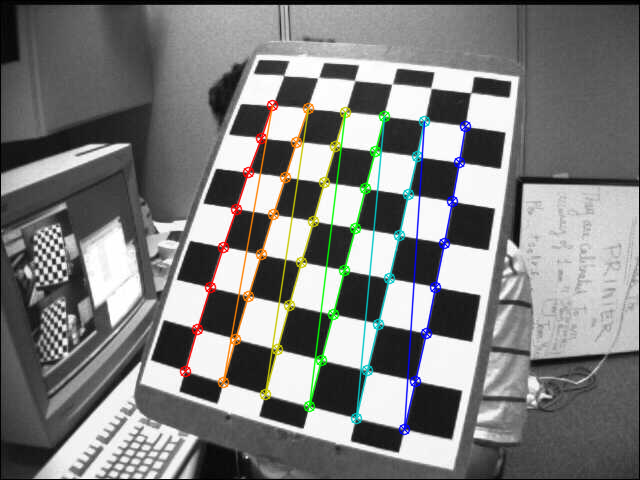

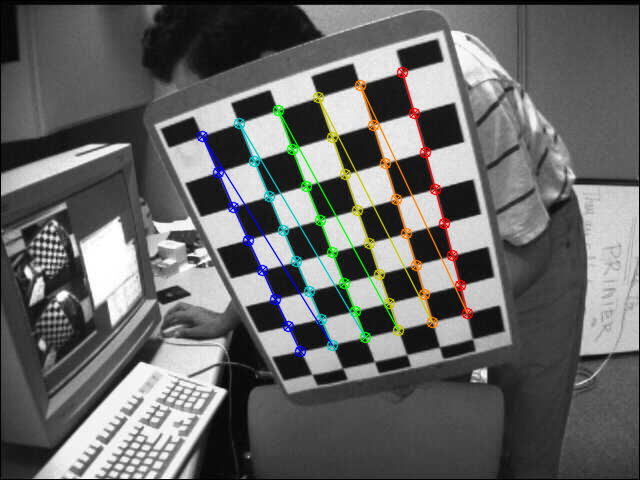

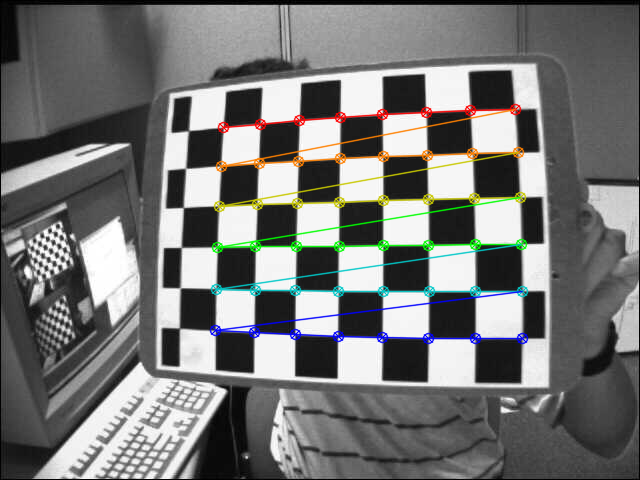

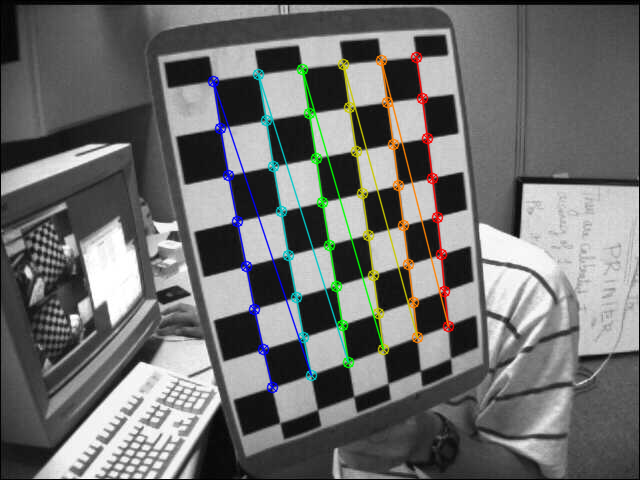

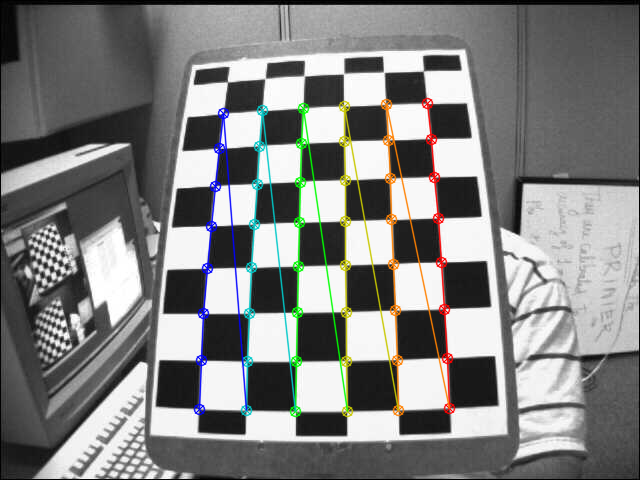

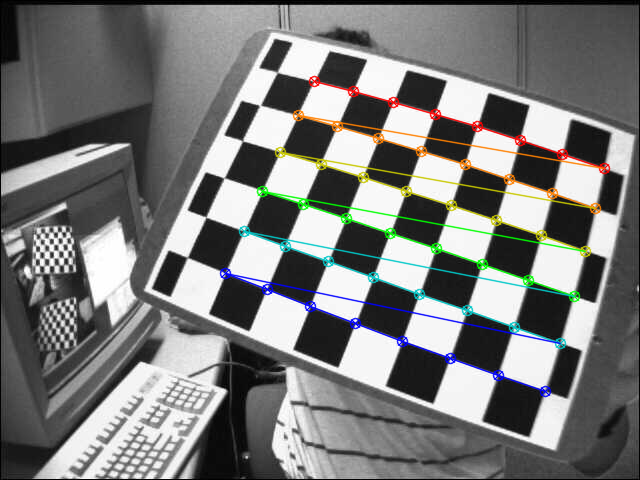

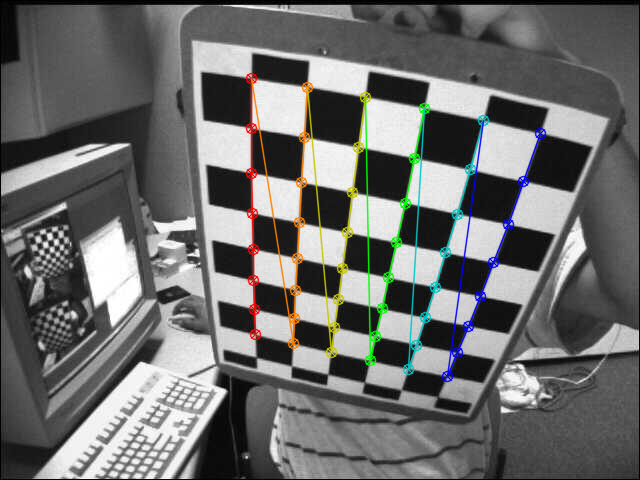

In [ ]:
# import relevant package
import numpy as np
import cv2
import matplotlib.pyplot as plt
# this package is to read several files in a folder
import glob
# for google colab only
from google.colab.patches import cv2_imshow

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# use images captured by camera
images = glob.glob("left*.jpg")

for fname in images:
    img = cv2.imread(fname)
    
    # Resize to make sure the image does not contain too much pixels for Opencv to find patterns
    img = cv2.resize(img, (640,480))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners, we use 7*6 grid
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
      objpoints.append(objp)

      # cv2.cornerSubPix() increases the accuracy of the corner coordinates
      corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
      imgpoints.append(corners2)

      # Draw and display the corners
      img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
      cv2_imshow(img)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)

# cv2.destroyAllWindows()
